# REAL RACING 3 VEHICLES - DATA ANALYSIS

# PART 3 - Revision 3

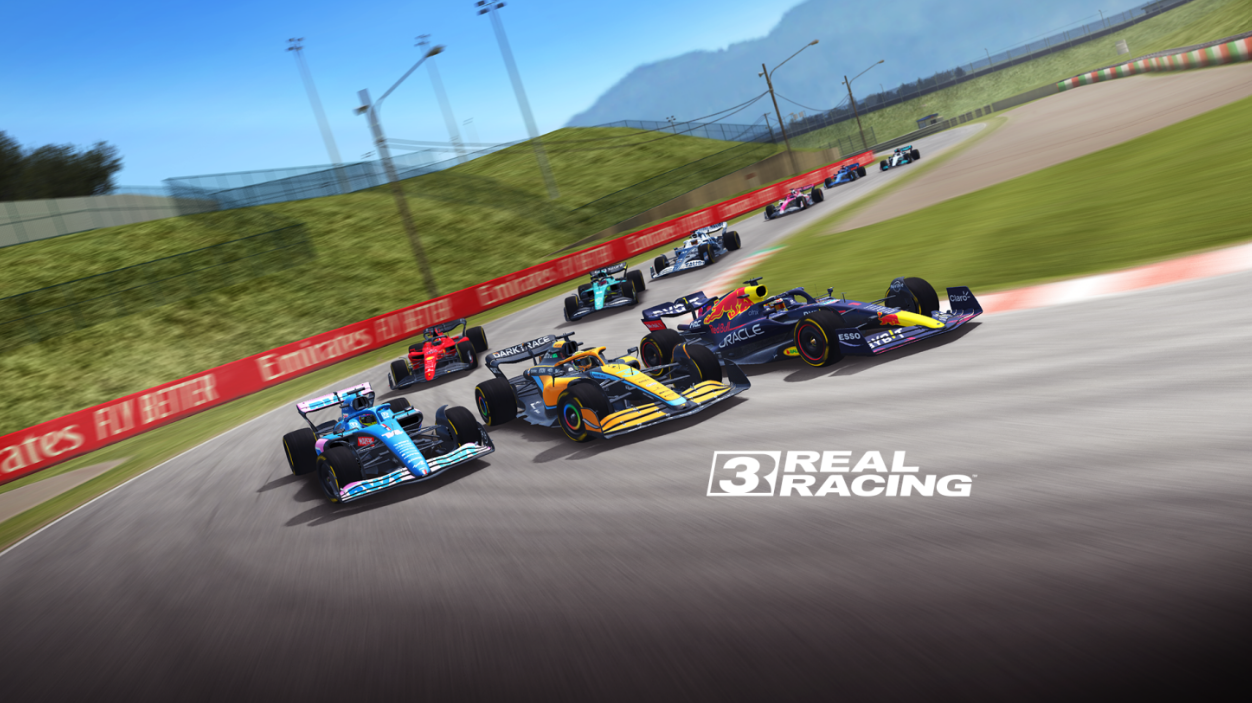

### Welcome to my 3rd part of data analysis for Real Racing 3 vehicles!

So far, we've performed lots of data analyses and revealed many expected and interesting results that provided us great insights about the vehicles in the **first two parts**.

Now, in the **3rd part**, my focus will be on **data visualization**. We know that a figure could tell us hundreds or even thousands of words, right?

As always, let's load the necessary modules initially. Again, we're going to use the vehicle roster from **game version 11.0**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Important!:**  GitHub may cause some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v11_0.csv')

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Let me check the dataset to make sure everything is loaded and prepared correctly:

In [4]:
rr3_df.head(7)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,1,450 Gold,180,1665,Yes,No,No,Yes
1,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,No,No
2,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,No,No
3,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,No
4,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415,Yes,No,No,Yes
5,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes
6,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes


In [5]:
rr3_df.tail(7)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
453,Toyota,Camry (Joe Gibbs Racing - 2021),45.4,298,3.45,29.3,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
454,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
455,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,Yes,No,No,No
456,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No
457,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,1,300 Gold,180,1377,Yes,No,No,Yes
458,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,1,350 Gold,180,1415,Yes,No,No,Yes
459,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes


_**OK, great! Here we are starting the 3rd part...**_

The last analysis done in the previous part was to make **a plot graph** to show the breakdown of **number of vehicles distributed for total career series availability**. Let me redo everything here, but with a few changes for better readability:

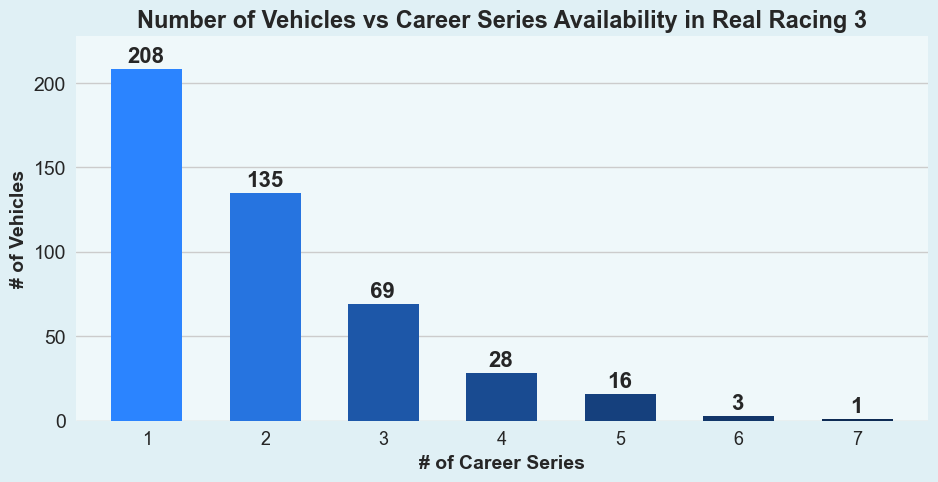

In [6]:
plt.style.use('seaborn')
plt.rcParams['figure.facecolor'] = '#e0f0f5'
plt.rcParams['axes.facecolor'] = '#eff8fa'
plt.rcParams['grid.color'] = '#eff8fa'
array_series = rr3_df['Series'].value_counts()
c = ['#2b84ff', '#2674e0', '#1d57a8', '#194b91', '#15407d', '#123669', '#0e2b54']
plt.figure(figsize=(11,5))
plt.bar(range(1,8), array_series, color=c, width=0.6, zorder=2)
plt.axis([0.4, 7.6, 0, 228])
for i in range(len(array_series)):
    if array_series.iloc[i] >= 100:    vsh = 0.84
    elif array_series.iloc[i] >= 10:   vsh = 0.89
    else:  vsh = 0.94
    plt.text(i+vsh, array_series.iloc[i]+4, array_series.iloc[i], fontsize=16, fontweight='bold')
plt.title('Number of Vehicles vs Career Series Availability in Real Racing 3', fontsize=17, fontweight='bold')
plt.xlabel('# of Career Series', fontsize=14, fontweight='bold')
plt.ylabel('# of Vehicles', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.show()

Trust me; with a visualization like this, it becomes easier to interpret the circumstances! Here, there are **208** vehicles that can be driven **only in 1 career series**. As seen in the figure above, this number certainly gets decreased when the number of career series availability increases, similar to exponential skew.

_If you wonder which vehicle had the most career series, again I urge you to check out the 1st part of the analysis..._

**It's time to focus on other things for our Real Racing 3 vehicle dataset.**

Following the same task, secondly, let's make another **bar graph** for counting **the vehicle classes** individually:

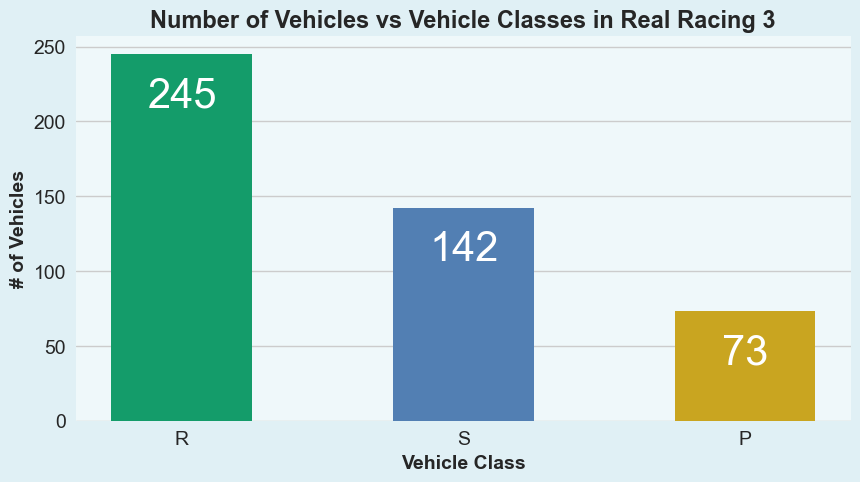

In [7]:
plt.figure(figsize=(10,5))
class_count = rr3_df['Class'].value_counts()
plt.bar(class_count.index, class_count.values, width=0.5, color=['#149c6a', '#527fb3', '#c9a520'], zorder=2)
plt.title('Number of Vehicles vs Vehicle Classes in Real Racing 3', fontsize=17, fontweight='bold')
for i in range(len(class_count)):
    if class_count[i] >= 100:   plt.text(i-0.12, class_count[i]-35, class_count[i], color='white', fontsize=30)
    else:   plt.text(i-0.08 ,class_count[i]-35, class_count[i], color='white', fontsize=30)
plt.xlabel('Vehicle Class', fontsize=14, fontweight='bold')
plt.ylabel('# of Vehicles', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(axis='y', dashes=(10,2), color='#cccccc', zorder=1)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.show()

As we've seen in the 2nd part of analysis, **R (Race) class** vehicles have the most appearance in the vehicle roster (with **245**). Considering the current shape of the game, the _Motorsports_ series contain lots of vehicles that belong to that class and those could also be found in the career series (under the name _Road Collection_).

About the rest, there are **142 S (Super) class** vehicles, which they are generally more expensive than **P-class** vehicles that their numbers are siginificantly less than other classes, **only 73**.

NEXT, how about the count of **purchase type** for all vehicles in version 11.0?

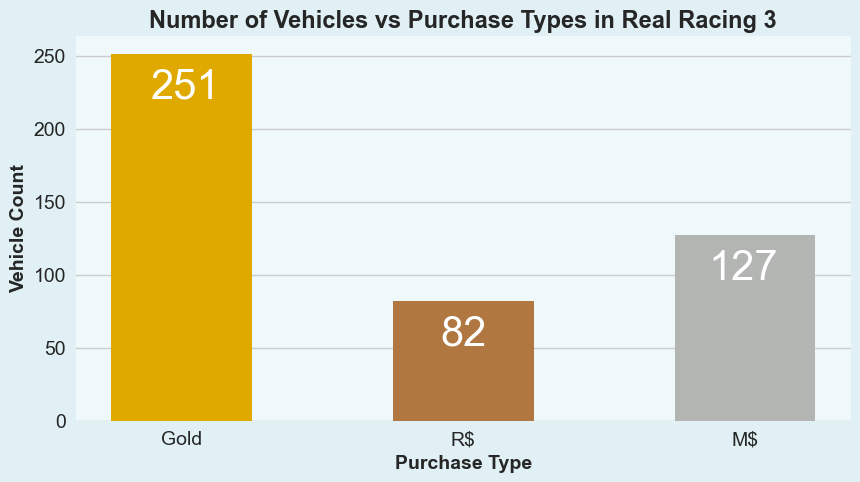

In [8]:
gold_c = rr3_df['Price'].str.contains('Gold').values.sum()
rdollar_c = rr3_df['Price'].str.contains('Rdollar').values.sum()
mdollar_c = rr3_df['Price'].str.contains('Mdollar').values.sum()
plt.figure(figsize=(10,5))
plt.bar(['Gold', 'R\$', 'M\$'], [gold_c, rdollar_c, mdollar_c], width=0.5, color=['#e0a900', '#b07741', '#b2b5b1'], zorder=2)
plt.text(-0.11, gold_c-30, gold_c, color='white', fontsize=30)
plt.text(0.92, rdollar_c-30, rdollar_c, color='white', fontsize=30)
plt.text(1.87, mdollar_c-30, mdollar_c, color='white', fontsize=30)
plt.title('Number of Vehicles vs Purchase Types in Real Racing 3', fontsize=17, fontweight='bold')
plt.xlabel('Purchase Type', fontsize=14, fontweight='bold')
plt.ylabel('Vehicle Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(axis='y', color='#cccccc', dashes=(10,3), zorder=1)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.show()

From the figure above, we can imply that there are lots of vehicles purchasable with **Gold, which exceeds 250**! When you progress further in the career series, then you'll encounter more vehicles that **require Gold to buy**. Moreover, new vehicles added to **Road Collection** series in every new version (including Season 1 and 2) are set to be obtained with Gold.

In addition, the vehicles that are selected as **the prize car** in each round of the Seasonal events, could be actually be bought with Gold, but the choice is closed for now because the game wants you to earn **Victory Points** to own it for free. To be honest, I'm still waiting for the opportunity to get them with Gold for a reasonable discount and without the enforcement to earn Victory Points, in the next versions...

Since the introduction of **2019 Season Formula 1 cars**, at the same time, we've been introduced with the **M\$** currency type, which has its own daily limit (still **250,000 M\$** maximum). Up until the latest version, many more vehicles with this purchase type have joined to the game, and now the number has been increased up to **127**!

About **R\$**, we are all getting used to the game with the vehicles that are purchased with this currency type. However, the choices for new vehicles with R\$ are becoming significantly less when progressed through the career series, and even with the release of new versions, **the number does not seem to be changed at all, still 82!**

_Remember, we have already performed lots of analyses in the previous part for those related to purchase types. You may want to check them out..._

Well, for a more complex operation, I'd like to **combine these two criterions**: The count is performed by comparing **the classes against their purchase types**. To make it work, I have to create another column to store only the purchase type as string (e.g. only `Rdollar`, `Gold` and `Mdollar`).

**Here, a pivot table will be useful here:**

In [9]:
def get_purchase_type(x):
    if type(x) != float and x[-7:] == 'Rdollar':    return 'Rdollar'
    elif type(x) != float and x[-4:] == 'Gold':     return 'Gold'
    elif type(x) != float and x[-7:] == 'Mdollar':  return 'Mdollar'
rr3_df['Purchase Type'] = rr3_df['Price'].apply(get_purchase_type)

In [10]:
cls_pt_table = rr3_df.pivot_table(index=['Class'], columns=['Purchase Type'], values=['Model'], aggfunc='count').fillna(0)
cls_pt_table.astype(int)

Model                
Purchase Type  Gold Mdollar Rdollar
Class                              
P                45       0      28
R               100     127      18
S               106       0      36

**That's more like it!** That table gave us much more insights for _the classes against the purchase types of the vehicles!_ 

Compare this with the bar graphs above; do these numbers match when summed?

Meanwhile, this cross-counting technique reveals another fact: Vehicles that are purchasable with **M\$** are all from **R class!** Plus, **Gold purchase-type** is dominant for **P and S** classes; however, with the release of new vehicles from **R** class in course of time, M\$ has passed Gold in terms of numbers!

_Now, time to represent them together with a nice visualization:_

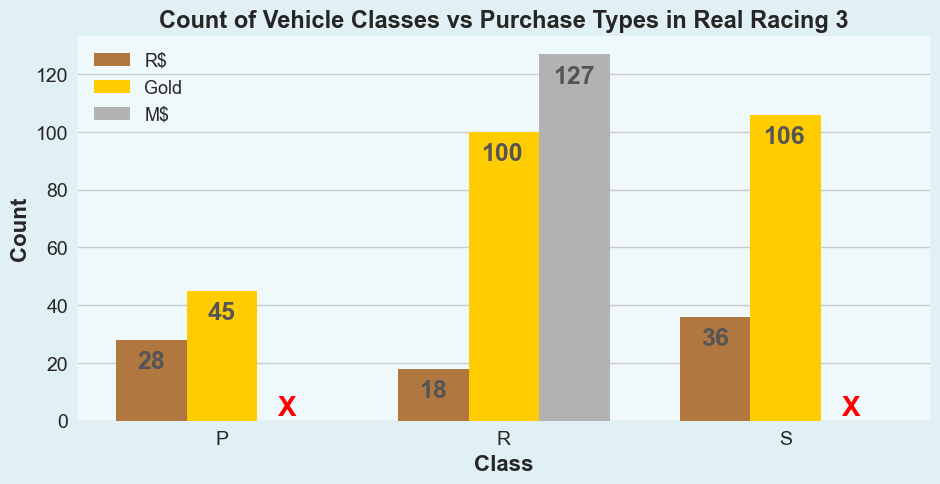

In [11]:
x = np.array([0, 0.5, 1])
fig, ax = plt.subplots(figsize=(11,5))
width = 0.125
ax.bar(x - width, cls_pt_table.loc[:,('Model','Rdollar')].values, width, label='R$', color='#b07741', zorder=2)
ax.bar(x, cls_pt_table.loc[:,('Model','Gold')].values, width, label='Gold', color='#ffcc00', zorder=2)
ax.bar(x + width, cls_pt_table.loc[:,('Model','Mdollar')].values, width, label='M$', color='#b2b2b2', zorder=2)
for i in range(3):
    if cls_pt_table.iloc[i,0] >= 100:    vsh = -0.04
    else:    vsh = -0.025
    plt.text(i/2+vsh, cls_pt_table.iloc[i,0]-10, int(cls_pt_table.iloc[i,0]), fontsize=18, 
             fontweight='bold', color='#555555')      
    plt.text(i/2-0.15, cls_pt_table.iloc[i,2]-10, int(cls_pt_table.iloc[i,2]), fontsize=18, 
             fontweight='bold', color='#555555')  
    if cls_pt_table.iloc[i,1] == 0:
        plt.text(i/2+0.1, cls_pt_table.iloc[i,1]+2, "X", fontsize=20, fontweight='bold', color='r')
    else:
        plt.text(i/2+0.087, cls_pt_table.iloc[i,1]-10, int(cls_pt_table.iloc[i,1]), fontsize=18, 
                 fontweight='bold', color='#555555')
plt.title('Count of Vehicle Classes vs Purchase Types in Real Racing 3', fontsize=17, fontweight='bold')
plt.xlabel('Class', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.xticks([0, 0.5, 1.0], ['P', 'R', 'S'], fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(axis='y', color='#cccccc', dashes=(10,3), zorder=1)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.legend(fontsize=13)
plt.show()

_Yep, this looks awesome! We successfully converted the above table into a bar graph with multiple values in it!_

By examining the table and the graph, our implication should be that you must have lots of gold and lots of M\$ in your wallet to be able to enjoy the races with **R-class** vehicles! There are **100** and **127** of them, respectively. For **S-class**, Gold is still dominating (which is **106**). For **P-class**, a gap is being formed between R\$ and Gold (**28** vs **45**).

Alternatively, now I want to do the same for **Class** against **Drive Type** together. However, some _data wrangling_ is needed for **Type**, such that I have to get rid of `(RHD)` and `(MHD)` that are found in the corresponding column as they are not necessary:

In [12]:
rr3_df['Type'] = rr3_df['Type'].apply(lambda x: x[:2])

**This should look good. Now, let's carry this out:**

In [13]:
cls_dt_table = rr3_df.pivot_table(index=['Class'], columns=['Type'], values=['Model'], aggfunc='count', margins=True).fillna(0)
cls_dt_table.astype(int)

Model                              
Type     F4  FF   FR  M4   MR R4  RR  All
Class                                    
P        11   7   43   2    5  0   5   73
R         5   2   77  10  139  0  12  245
S         5   1   35  29   52  3  17  142
All      21  10  155  41  196  3  34  460

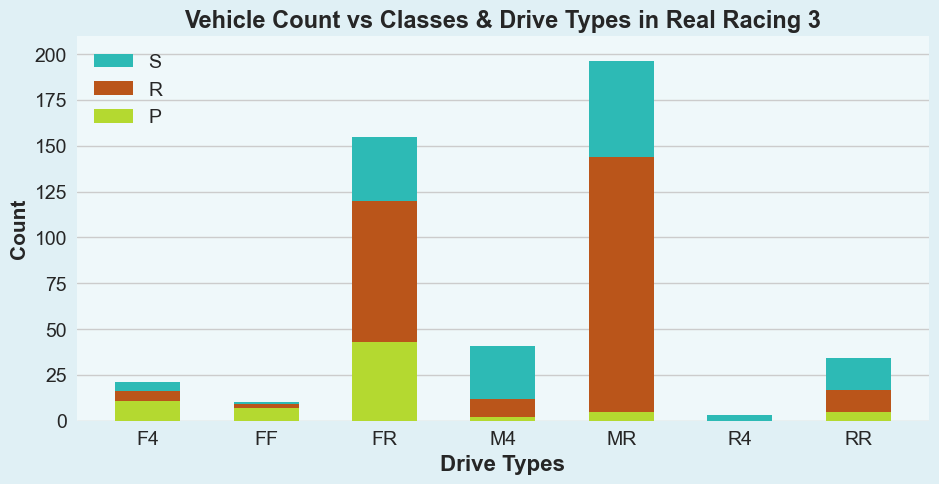

In [14]:
width = 0.25
table_columns = cls_dt_table.columns.levels[1][1:]
w = 0.55
plt.figure(figsize=(11,5))
plt.axis([-0.6, 6.6, 0, 210])
plt.bar(table_columns, cls_dt_table.loc['S'][:7], bottom=(cls_dt_table.loc['P'][:7]+cls_dt_table.loc['R'][:7]), 
        label='S', color='#2dbab5', width=w, zorder=2)
plt.bar(table_columns, cls_dt_table.loc['R'][:7], bottom=cls_dt_table.loc['P'][:7], label='R', color='#ba551a', 
        width=w, zorder=2)
plt.bar(table_columns, cls_dt_table.loc['P'][:7], label='P', color='#b4d930', width=w, zorder=2)
plt.title('Vehicle Count vs Classes & Drive Types in Real Racing 3', fontsize=17, fontweight='bold')
plt.xlabel('Drive Types', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper left')
# plt.grid(axis='y', color='#cccccc', dashes=(10,2,5,2), zorder=1)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.show()

_Here, this time **a stacked bar** is a great visualization for this purpose._

From the pivot table and the figure above, it seems that **MR-drive type** possesses the most density **(196)** among all vehicles in Real Racing 3 (v11.0), moderately more than **FR-drive type** (where the gap is **41**). In addition, **R-class** is favored for both drive types.

About the highest count of class/drive type combination, we can come across **139** vehicles as **R-class with MR-type** (confirm this with your own eyes!).

Last but not the least, it is clear to see that the rest are significantly lower than the aforementioned drive types. Moreover, these combinations are the rarest ones you could drive: **S-class/FF**, **R-class/FF**, **P-class/M4** and **S-class/R4**.

_**On to the next one...**_

In the 2nd part of the analysis, we've counted **how many vehicles an existing manufacturer had** in RR3, but only output these with more than 10. Plus, the manufacturers that are represented with **only a single vehicle**...

Now, let's get the big picture to see everything, with **horizontal bar** figure! There are two things to consider in advance:

* **Mercedes-Benz** and **Mercedes-AMG** were combined as **Mercedes** to avoid the distiction.
* **Formula 1** and **Formula E** take place here although they are not considered as manufacturers, rather _motorsport disciplines_ at all.
* The discontinued vehicles from **NASCAR** and **Supercar series** under various manufacturers are also included.

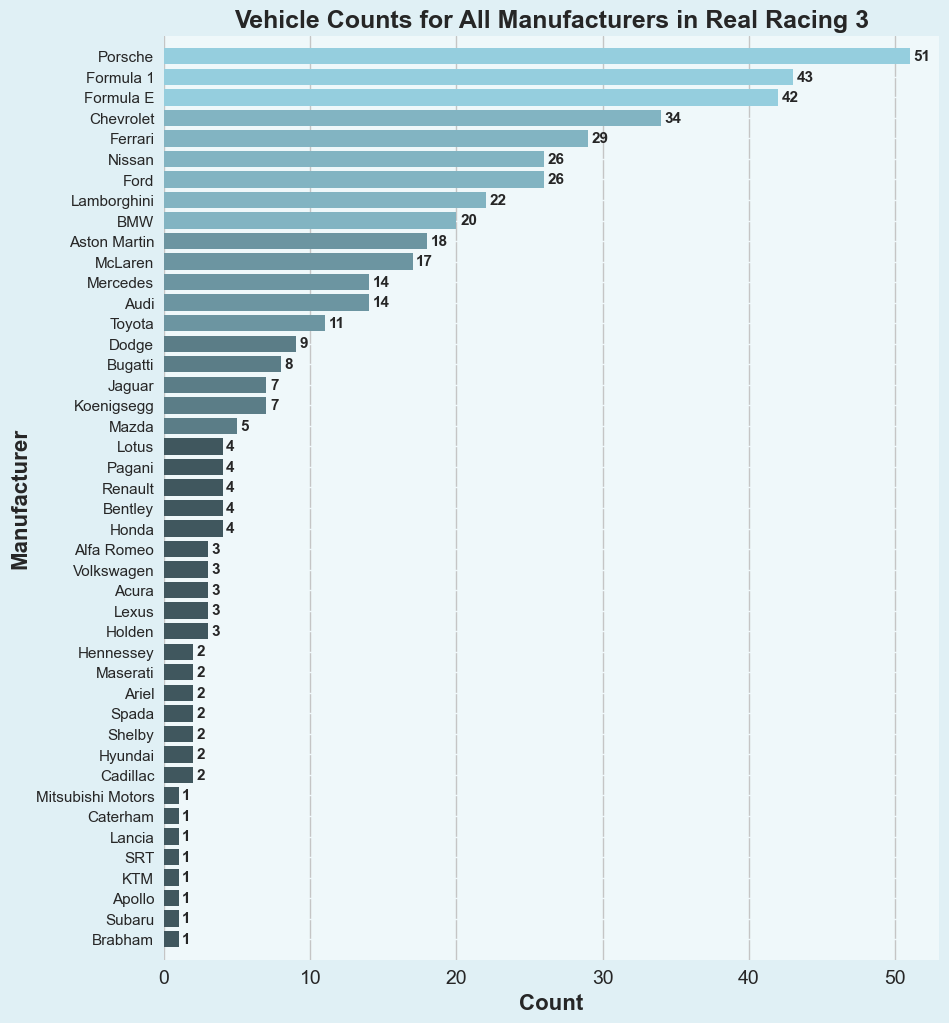

In [15]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)
manu_count = rr3_df['Manufacturer'].value_counts(ascending=True)
c = []
for v in manu_count:
    if v >= 40:    c.append('#95cede')
    elif v >= 20:  c.append('#82b4c2')
    elif v >= 10:  c.append('#6c95a1')
    elif v >= 5:   c.append('#5b7d87')
    else:    c.append('#40575e')
plt.figure(figsize=(10,12))
plt.axis([0, 53, -1, 44])
plt.barh(manu_count.index, manu_count, color=c, zorder=2)
for i in range(len(manu_count)):
    plt.text(manu_count[i]+0.25, i-0.2, manu_count[i], fontsize=11, fontweight='bold')
plt.title("Vehicle Counts for All Manufacturers in Real Racing 3", fontsize=18, fontweight='bold')
plt.xlabel("Count", fontsize=16, fontweight='bold')
plt.ylabel("Manufacturer", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=11)
plt.grid(axis='x', color='#c5c5c5', zorder=1)
plt.show()

**OUTSTANDING!** From this big picture, there is no doubt that **Porsche** is the most favorite manufacturer by the game, with over **50 different vehicles** can be driven (was confirmed in previous part of the analyses, too).

If we exclude Formual 1 and Formula E, the runner-up is **Chevrolet** with 34. Then, **Ferrari**, **Nissan**, **Ford**, **Lamborghini** and **BMW** with greater than or equal to 20.

**Formula 1** and **Formula E** together contain **more than 80 vehicles** spreaded across multiple seasons to race in their own series; but if you already know, there is also **Mercedes-AMG Safety Car** to be found in Formula 1 section (yeah, I knowingly did not place this under Mercedes brand itself).

Next, several popular manufacturers can be seen: **Aston Martin**, **McLaren**, **Audi**, **Mercedes** and **Toyota**; having more than 10 vehicles in common.

Besides, as already known in the previous part, these manufacturers are represented with only **one** vehicle in Real Racing 3: **Mitsubishi**, **Subaru**, **Brabham**, **SRT**, **Caterham**, **Lancia**, **Apollo** and **KTM**.

Here, we encounter other specific manufacturers; for example, those with **two** vehicles: **Spada**, **Hennessey**, **Ariel**, **Maserati**, **Hyundai**, **Shelby** and **Cadillac**.

Continuing our visualizations for Real Racing 3, we already know that all vehicle stats are stored as numeric values. These are **Top Speed**, **Acceleration**, **Braking** and **Grip**.

How about creating the frequencies of each stat category via **histograms** individually?

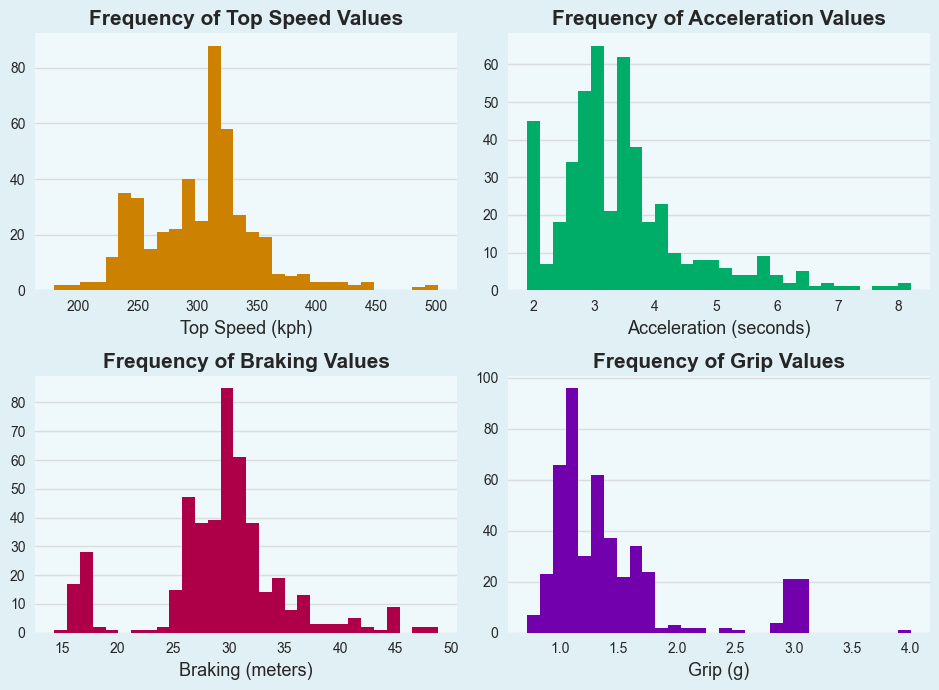

In [16]:
plt.figure(figsize=(9.5,7))
plt.subplot(2,2,1)
plt.title("Frequency of Top Speed Values", fontsize=15, fontweight='bold')
plt.hist(rr3_df['Top Speed'], bins=30, color='#cc8100', zorder=2)
plt.xlabel('Top Speed (kph)', fontsize=13)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(2,2,2)
plt.title("Frequency of Acceleration Values", fontsize=15, fontweight='bold')
plt.hist(rr3_df['Acceleration'], bins=30, color='#00ad68', zorder=2)
plt.xlabel('Acceleration (seconds)', fontsize=13)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(2,2,3)
plt.title("Frequency of Braking Values", fontsize=15, fontweight='bold')
plt.hist(rr3_df['Braking'], bins=30, color='#ad0048', zorder=2)
plt.xlabel('Braking (meters)', fontsize=13)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(2,2,4)
plt.title("Frequency of Grip Values", fontsize=15, fontweight='bold')
plt.hist(rr3_df['Grip'], bins=30, color='#7300ad', zorder=2)
plt.xlabel('Grip (g)', fontsize=13)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.tight_layout()
plt.show()

**They all look great!** Here are the remarkable observations from these outcomes:

* **Top Speed:** somewaht resembles a bell curve; over **80 vehicles** have top speeds of around **320 kph**.
* **Acceleration:** Lots of values are aligned to the left side; thus vehicles with acceleration of **less than 4 seconds** are more frequent.
* **Braking:** The overall shape is bell curve more likely, but slightly irregular than Top Speed, due to another local bell curve on the left side; it looks like more than **200 vehicles** have braking performance at **around 30 meters**.
* **Grip:** We come across values that lie to the left side again; it is very likely to see lots of vehicles with **0.9-1.7 g** cornering capability in a **broad interval**; those with **around 3.0 g** should come from currently existing Formula 1 vehicles.

In addition to these histograms, let's create more, including **PR**, **Service Cost** and **Service Time**:

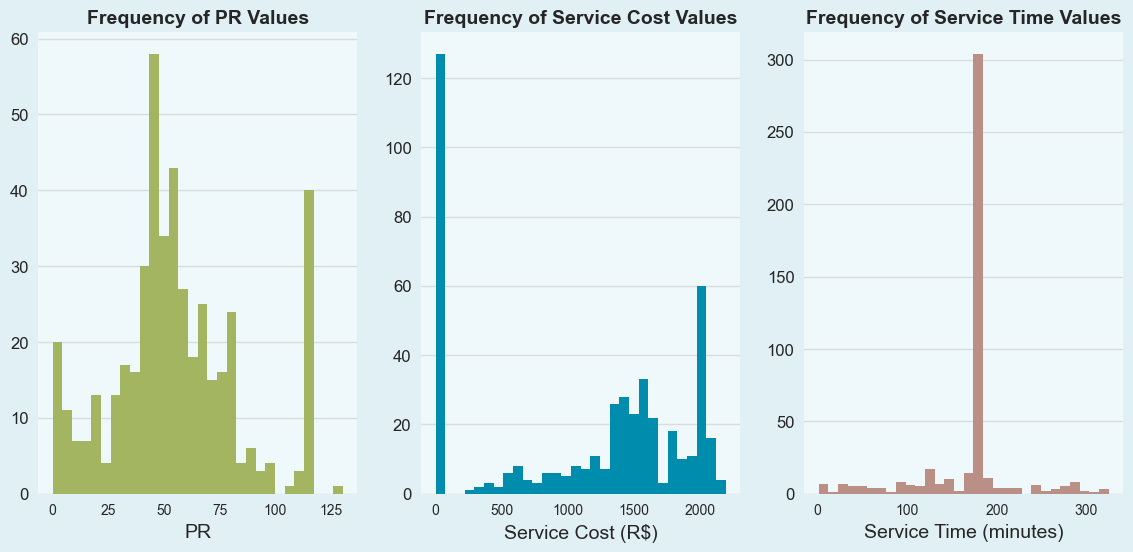

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.title("Frequency of PR Values", fontsize=14, fontweight='bold', zorder=2)
plt.hist(rr3_df['PR'], bins=30, color='#a3b560', zorder=2)
plt.xlabel("PR", fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(1,3,2)
plt.title("Frequency of Service Cost Values", fontsize=14, fontweight='bold', zorder=2)
plt.hist(rr3_df['Service Cost'], bins=30, color='#008dad', zorder=2)
plt.xlabel("Service Cost (R$)", fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(1,3,3)
plt.title("Frequency of Service Time Values", fontsize=14, fontweight='bold', zorder=2)
plt.hist(rr3_df['Service Time'], bins=30, color='#ba9086', zorder=2)
plt.xlabel("Service Time (minutes)", fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.show()

What can we say about these **histograms** above? It is certain that one can easily imply those with visible very tall rods:

* **PR:** There is higher chance to encounter vehicles with PR between **40.0-60.0**. Note that the rod that has risen to **40** at around **115.0 PR** due to **Formula 1 vehicles**. 
* **Service Cost:** The values are more likely to lie in the right side; most values are coming from between **1300** and **2000 R\$**. However, all vehicles with M\$ purchase-type can be serviced **at no cost** and thus, don't be shocked why the corresponding rod on the leftmost is so tall like this **(it's more than 120)**.
* **Service Time:** This doesn't make you surprised at all, more than **300 vehicles** have a 180-minute service time and it's getting increased with newer vehicles included. The rest is not evenly distributed, is it?

After these, I'd like to see the histograms of **the price values of all vehicles over available currencies:**, `R$`, `Gold` and `M$`. Although we've done many related analysis in the previous parts, this will allow us to inspect these values from a different angle:

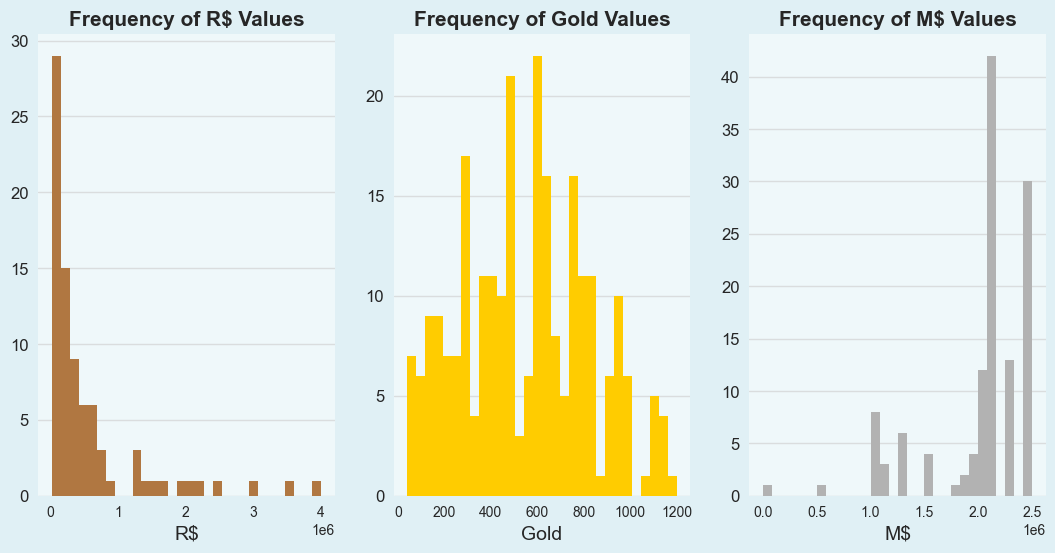

In [18]:
currency_val = {'Rdollar': [], 'Gold': [], 'Mdollar': []}
for val in rr3_df['Price']:
    if 'Rdollar' in val:
        currency_val['Rdollar'].append(int(val[:-8]))
    elif 'Gold' in val:
        currency_val['Gold'].append(int(val[:-5]))
    elif 'Mdollar' in val:
        currency_val['Mdollar'].append(int(val[:-8]))
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
plt.hist(currency_val['Rdollar'], bins=30, color='#b07741', zorder=2)
plt.title('Frequency of R\$ Values', fontsize=15, fontweight='bold')
plt.xlabel('R\$', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(1,3,2)
plt.hist(currency_val['Gold'], bins=30, color='#ffcc00', zorder=2)
plt.title('Frequency of Gold Values', fontsize=15, fontweight='bold')
plt.xlabel('Gold', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.subplot(1,3,3)
plt.hist(currency_val['Mdollar'], bins=30, color='#b2b2b2', zorder=2)
plt.title('Frequency of M\$ Values', fontsize=15, fontweight='bold')
plt.xlabel('M\$', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.6, color='#cccccc', zorder=1)
plt.show()

**Nice! What can we imply from these three plots above?**

* **R\$:** The dominance of values come from **the very low ones like under 200,000 R\$**, which is **close to 30**; in a large manner, most of the values belong to those **under 1 million R\$**.
* **Gold:** Over 40 vehicles have prices **around 600 Gold**, which has the most occurrence; the similar one is to those with **around 500 Gold** and **around 300**. When you look at the shape in general, the values may seem to be distributed somewhat regularly but with fluctuations, when getting away from the mentioned values.
* **M\$:** Lots of values lie to the right side; **more than 50 vehicles** have the value **slightly greater than or equal to 2 million**, where **30 vehicles** have the price of **2.5 million** (they should be 2020, 2021 & 2022 Season Formula 1 Cars).

Now, let's take a different perspective: Why not creating **ECDFs (Empirical Cumulative Distribution Functions)** with the values from vehicle stats?

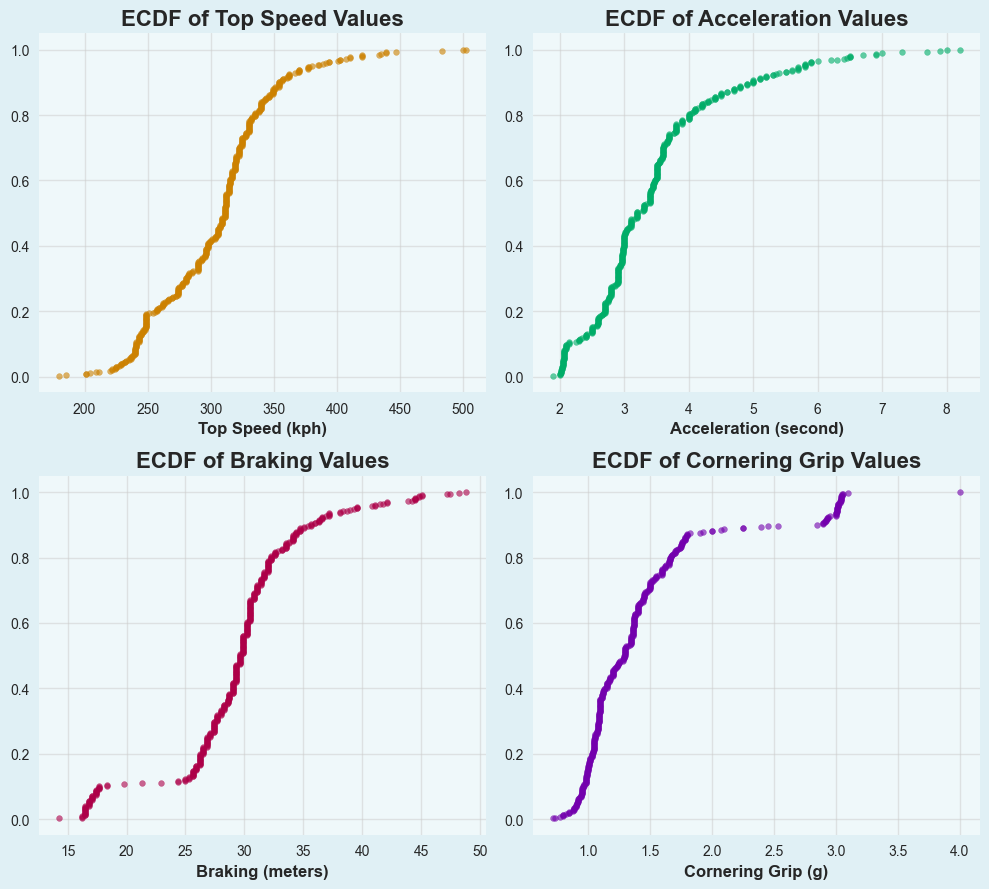

In [19]:
# The main function to create the ECDF
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
x_speed, y_speed = ECDF(rr3_df['Top Speed'])
plt.scatter(x_speed, y_speed, marker='.', color='#cc8100', s=70, alpha=0.6)
plt.title('ECDF of Top Speed Values', fontsize=16, fontweight='bold')
plt.xlabel('Top Speed (kph)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,2,2)
x_acc, y_acc = ECDF(rr3_df['Acceleration'])
plt.scatter(x_acc, y_acc, marker='.', color='#00ad68', s=70, alpha=0.6)
plt.title('ECDF of Acceleration Values', fontsize=16, fontweight='bold')
plt.xlabel('Acceleration (second)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,2,3)
x_brake, y_brake = ECDF(rr3_df['Braking'])
plt.scatter(x_brake, y_brake, marker='.', color='#ad0048', s=70, alpha=0.6)
plt.title('ECDF of Braking Values', fontsize=16, fontweight='bold')
plt.xlabel('Braking (meters)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,2,4)
x_grip, y_grip = ECDF(rr3_df['Grip'])
plt.scatter(x_grip, y_grip, marker='.', color='#7300ad', s=70, alpha=0.6)
plt.title('ECDF of Cornering Grip Values', fontsize=16, fontweight='bold')
plt.xlabel('Cornering Grip (g)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.tight_layout()
plt.show()

**Here are the results we can observe from the figure above:**

* Most of the vehicles have the TOP SPEED of between **300 and 350 kph** (pay attention to the density of dots). Besides, in general, **over 80%** of the vehicles have **less than 350 kph** top speed.
* For ACCELERATION, the related dots rapidly rise up in the left side; **almost 80%** of the vehicles in Real Racing 3 (v11.0) have acceleration values being **less than 4 seconds**. Remarkably, some small groups of dots can appear vertically as they have the same acceleration values.
* Speaking of BRAKING values, again an almost-regular distribution of values can be seen, though some disconnections exist. Vehicles most likely have **around 30 meters** of braking performance. Note the situation in the bottom left; that's because **all Formula 1 vehicles (including 2022 Season)**, plus a few in the Road Collection, have very stong braking capabilities **(values appearing under 20 meters)**. In contrast, several vehicles have much worse values than others **(which is over 40 meters)**; that might be because such vehicles should be slow ones in w.r.t. top speeds.
* The distribution of values for CORNERING GRIP is somewhat similar to the ones in acceleration. Most vehicles have between **0.9-1.5 g** cornering capability and the skewness derived from the dots continues until **about 1.8 g**. Again, don't be surprised as **all Formula 1** and similar vehicles have **between 2.9-3.1 g**, thus the dots gathering around there consequently. Plus, **a big outlier** exists on the rightmost side whose value is exactly **4.0 g**! _If you'd like to know which one had this extreme value, don't hesitate to check out the previous analysis..._

All in all, these substantially support the statements we've made for the corresponding **histograms** above...

Next, can we find any correlation with **PR** values if we combine these ECDFs above, through our eyes?

For this to work, all these values above, including PR, **must be normalized**; between 0.0 and 1.0!

**After that, we come across this output:**

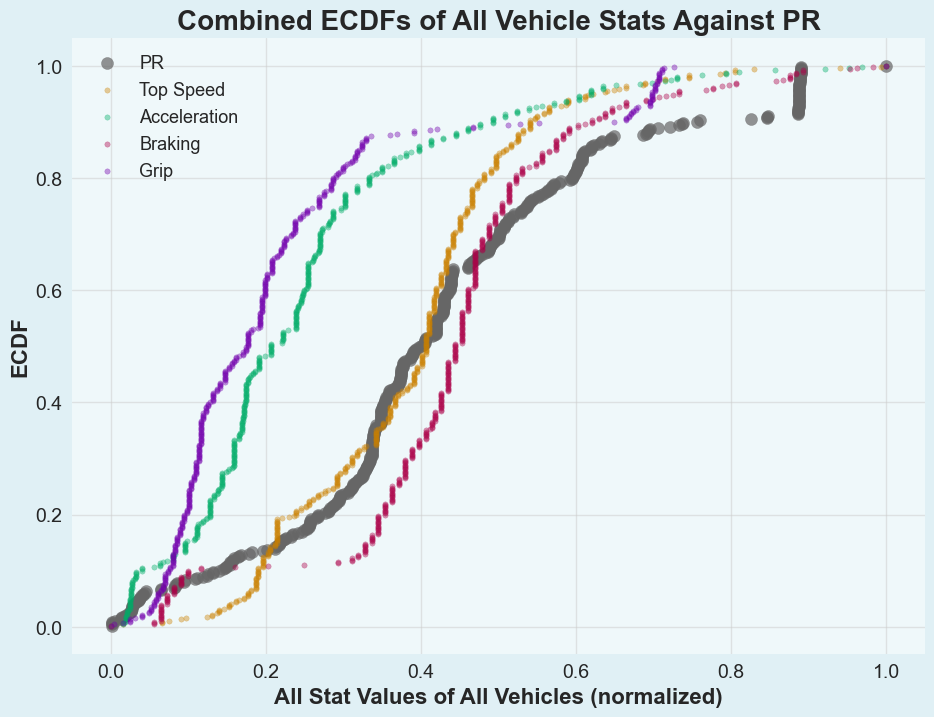

In [20]:
x_pr, y_pr = ECDF(rr3_df['PR'])
x_pr /= x_pr.max()
x_speed = x_speed.astype('float64')
x_speed -= x_speed.min()
x_speed /= x_speed.max()
x_acc -= x_acc.min() 
x_acc /= x_acc.max()
x_brake -= x_brake.min()
x_brake /= x_brake.max()
x_grip -= x_grip.min()
x_grip /= x_grip.max()
plt.figure(figsize=(11,8))
plt.scatter(x_pr, y_pr, marker='.', color='#666666', s=300, label='PR', alpha=0.7)
plt.scatter(x_speed, y_speed, marker='.', color='#cc8100', s=60, label='Top Speed', alpha=0.4)
plt.scatter(x_acc, y_acc, marker='.', color='#00ad68', s=60, label='Acceleration', alpha=0.4)
plt.scatter(x_brake, y_brake, marker='.', color='#ad0048', s=60, label='Braking', alpha=0.4)
plt.scatter(x_grip, y_grip, marker='.', color='#7300ad', s=60, label='Grip', alpha=0.4)
plt.title('Combined ECDFs of All Vehicle Stats Against PR', fontsize=20, fontweight='bold')
plt.xlabel('All Stat Values of All Vehicles (normalized)', fontsize=16, fontweight='bold')
plt.ylabel('ECDF', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.grid(alpha=0.5, color='#cccccc', zorder=1)
plt.show()

After normalizing everything here, it might be weird in the first place!

Anyway, from this complicated ECDF plot, **from 20% up to about 45%**, the PR value roughly follow the values of **top speed**, sometimes being exactly on them and sometimes staying so close both at the left or right side. However, **after 45% to 90%**, the PR value becomes the rightmost one!

From the plot above additionally, **grip** and **acceleration** are always on the left part of PR **(assume we neglect the first 5%)**; **braking** values are on the right part **from about 5% to 45%**, then swap position to the left, similar to top speed.

While determining the PR, in my opinion, braking and top speed together seem to have **stronger effects** while grip and acceleration have **weaker**. _All in all, it may not be a great method to completely imply the relationships, but it was a nice attempt to get it there, right?_

After the ECDF operation, now I'd like to see the **correlations between these 4 stat groups of values**... Let's tackle them all by creating plots individually and find their relationships in terms of _positivity_ or _negativity with a solid line:_

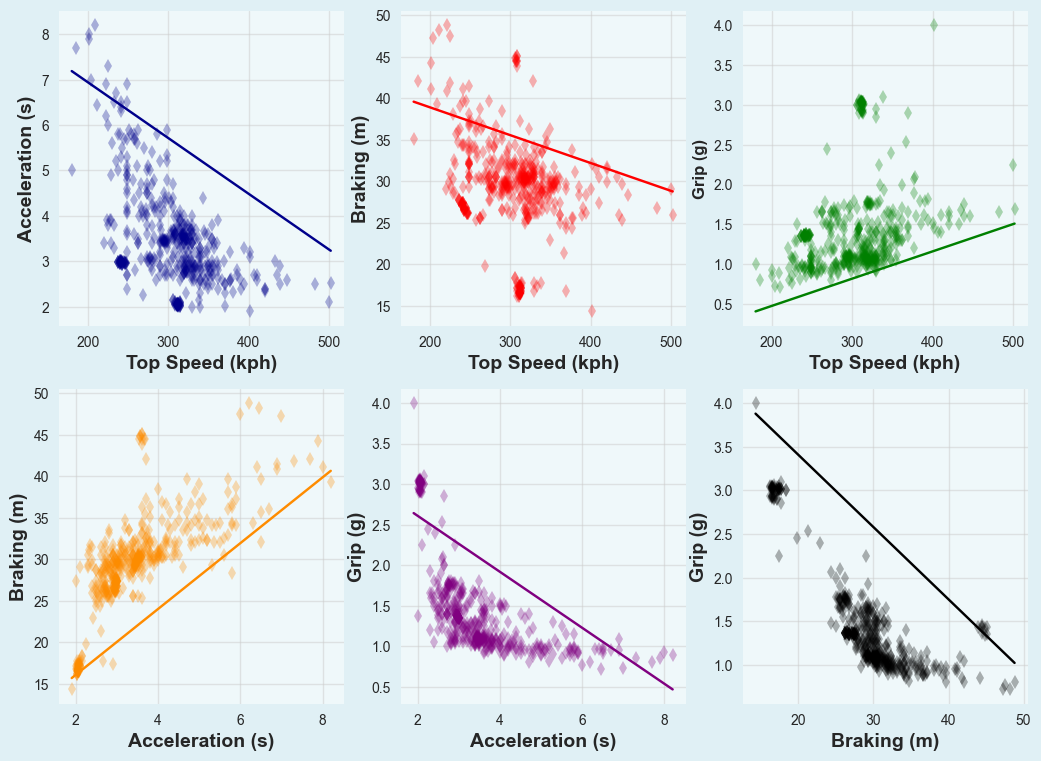

In [21]:
top_speed = rr3_df['Top Speed'].values
acc = rr3_df['Acceleration'].values
braking = rr3_df['Braking'].values
grip = rr3_df['Grip'].values
plt.figure(figsize=(12.5,9))
plt.subplot(2,3,1)
z = np.polyfit(top_speed, acc, 1)
plt.plot(top_speed, acc, marker='d', linestyle='none', alpha=0.3, color='darkblue')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='darkblue')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold')
plt.ylabel('Acceleration (s)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,3,2)
z = np.polyfit(top_speed, braking, 1)
plt.plot(top_speed, braking, marker='d', linestyle='none', alpha=0.3, color='red')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='red')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold')
plt.ylabel('Braking (m)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,3,3)
z = np.polyfit(top_speed, grip, 1)
plt.plot(top_speed, grip, marker='d', linestyle='none', alpha=0.3, color='green')
plt.plot([top_speed.min(), top_speed.max()], [z[1], z[1]+(z[0]*(top_speed.max()-top_speed.min()))], color='green')
plt.xlabel('Top Speed (kph)', fontsize=14, fontweight='bold')
plt.ylabel('Grip (g)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,3,4)
z = np.polyfit(acc, braking ,1)
plt.plot(acc, braking, marker='d', linestyle='none', alpha=0.3, color='darkorange')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='darkorange')
plt.xlabel('Acceleration (s)', fontsize=14, fontweight='bold')
plt.ylabel('Braking (m)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,3,5)
z = np.polyfit(acc, grip, 1)
plt.plot(acc, grip, marker='d', linestyle='none', alpha=0.3, color='purple')
plt.plot([acc.min(), acc.max()], [z[1], z[1]+(z[0]*(acc.max()-acc.min()))], color='purple')
plt.xlabel('Acceleration (s)', fontsize=14, fontweight='bold')
plt.ylabel('Grip (g)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.subplot(2,3,6)
z = np.polyfit(braking, grip, 1)
plt.plot(braking, grip, marker='d', linestyle='none', alpha=0.3, color='black')
plt.plot([braking.min(), braking.max()], [z[1], z[1]+(z[0]*(braking.max()-braking.min()))], color='black')
plt.xlabel('Braking (m)', fontsize=14, fontweight='bold')
plt.ylabel('Grip (g)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.5, color='#cccccc')
plt.show()

_**It is great to examine all these correlations in just one plotting group, isn't it?**_ 

At the same time, let's get the **correlation coefficients (Pearson)** in numerical way:

In [22]:
tspeed_values = rr3_df['Top Speed'].values
acc_values = rr3_df['Acceleration'].values
brake_values = rr3_df['Braking'].values
grip_values = rr3_df['Grip'].values
print("** CORRELATIONS **")
print("Top Speed vs Acceleration: {:6.3f}".format(np.corrcoef(tspeed_values, acc_values)[0,1]))
print("Top Speed vs Braking:      {:6.3f}".format(np.corrcoef(tspeed_values, brake_values)[0,1]))
print("Top Speed vs Grip:         {:6.3f}".format(np.corrcoef(tspeed_values, grip_values)[0,1]))
print("Acceleration vs Braking:   {:6.3f}".format(np.corrcoef(acc_values, brake_values)[0,1]))
print("Acceleration vs Grip:      {:6.3f}".format(np.corrcoef(acc_values, grip_values)[0,1]))
print("Braking vs Grip:           {:6.3f}".format(np.corrcoef(brake_values, grip_values)[0,1]))

** CORRELATIONS **
Top Speed vs Acceleration: -0.529
Top Speed vs Braking:      -0.269
Top Speed vs Grip:          0.270
Acceleration vs Braking:    0.736
Acceleration vs Grip:      -0.634
Braking vs Grip:           -0.818


_**Compare both the values here and the corresponding plots, including the lines going upward or downward. Consequently, they mutually look very logical, don't they?**_

It is definitely right to say that _Top Speed & Acceleration_ are **negatively correlated** with a magnitude of 0.529, with regards to the numerical values. That is, if the vehicle can reach **higher top speed**, it is expected to have **faster acceleration**, thus **lower values**. _This is the most accurate claim we can get..._

Similarly, _Top Speed & Braking,_ _Acceleration & Grip_ and _Braking & Grip_ are also **negatively correlated** with different magnitudes as seen above. (Respective values are -0.269, -0.634, -0.818)

On the other hand, these two pairs are **positively correlated**: _Top Speed & Grip_ and _Acceleration & Braking_ with magnitude of 0.270 and 0.736, respectively. So, if one value is increasing, then it is expected for the other one to go up, where greater effect can be seen for the second pair.

Now, can we consolidate everything such that their correlations are packed together and color-coded?

**Heat map** visualization will help us substantially for that! This time, we include three additional columns: **PR**, **Service Cost** and **Service Time**.

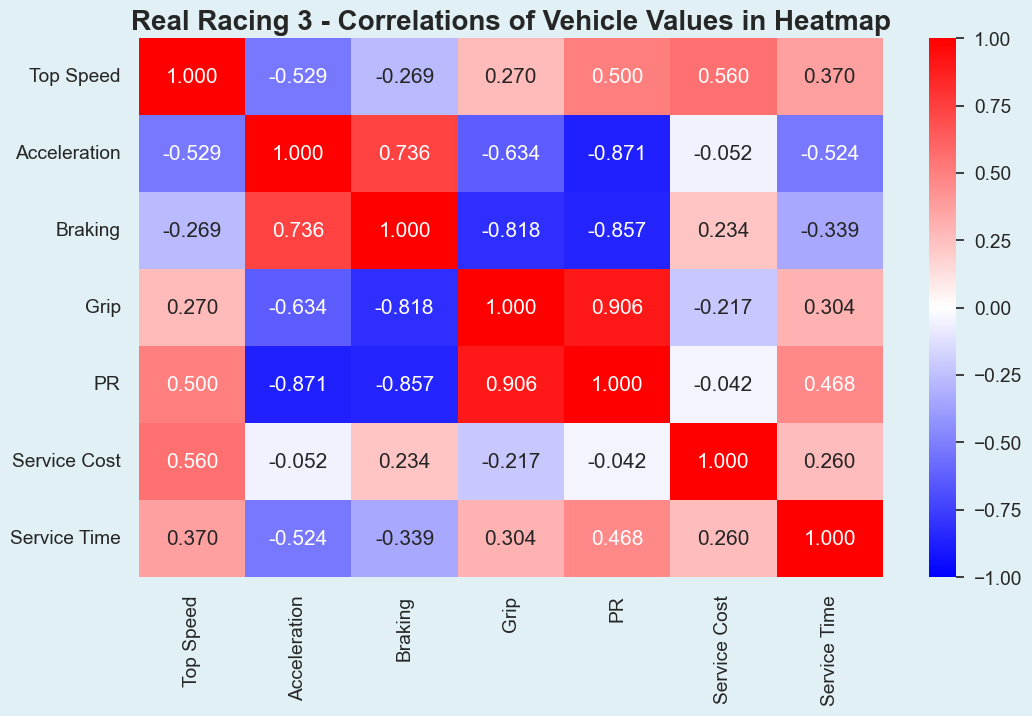

In [23]:
rr3_df_vehicle_values = rr3_df[['Top Speed', 'Acceleration', 'Braking', 'Grip', 'PR', 'Service Cost', 'Service Time']]
plt.figure(figsize=(12,7))
sns.set(font_scale=1.25)
sns.heatmap(rr3_df_vehicle_values.corr(), cmap='bwr', annot=True, vmin=-1, vmax=1, fmt='.3f')
plt.title('Real Racing 3 - Correlations of Vehicle Values in Heatmap', fontsize=20, fontweight='bold')
plt.show()

**Excellent!** All these correlation values are beautifully here in **a heat map**. 

For the first 4 columns, **they should be exactly the same** with the values we calculated above. Plus, inspect the added columns (PR, Service Cost & Service Time) in terms of their correlations against the existing ones...

Interestingly, **PR** has **much higher** correlation magnitudes especially when compared to _Acceleration,_ _Braking_ and _Grip;_ being close to **0.9** both positively and negatively.

Finally, I want to generate some **box plots**, seperated by **the vehicle classes**.

Let's see the **mean**, **median**, **quantiles** and **possible outliers** of these columns visually:

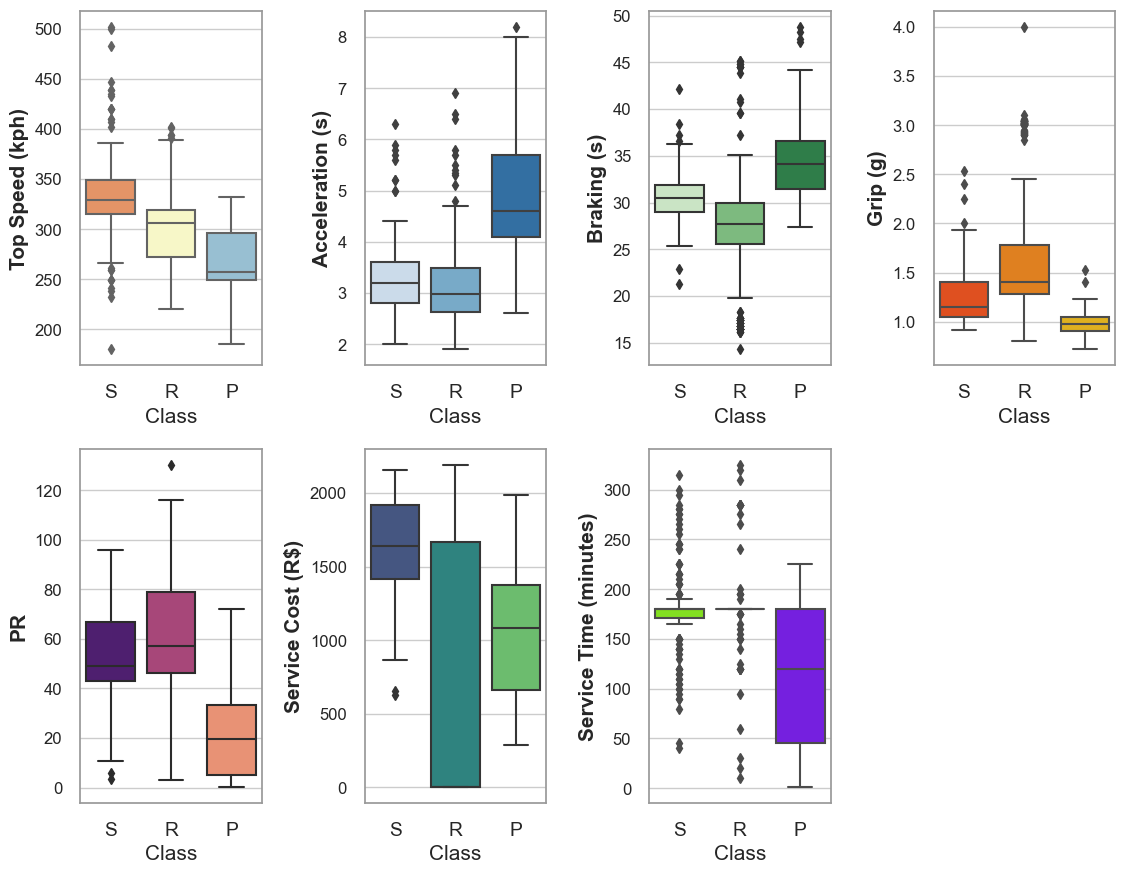

In [24]:
plt.figure(figsize=(11.5,9))
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#999999'
plt.subplot(2,4,1)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Top Speed'], palette='RdYlBu')
plt.ylabel('Top Speed (kph)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,2)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Acceleration'], palette='Blues')
plt.ylabel('Acceleration (s)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,3)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Braking'], palette='Greens')
plt.ylabel('Braking (s)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,4)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Grip'], palette='autumn')
plt.ylabel('Grip (g)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,5)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['PR'], palette='magma')
plt.ylabel('PR', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,6)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Service Cost'], palette='viridis')
plt.ylabel('Service Cost (R\$)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.subplot(2,4,7)
sns.boxplot(x=rr3_df['Class'], y=rr3_df['Service Time'], palette='hsv')
plt.ylabel('Service Time (minutes)', fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', color='#cccccc')
plt.tight_layout()
plt.show()

These box plots should give **much more valuable insights** and the separation by classes enabled us to identify the characteristics of vehicles much more! **Fantastic!**

Let me tell you what these lines in and out of these boxes mean, with respect to data science:

- The horizontal bottom line outside of the colored box represents the **minimum confidence interval** value.
- The horizontal bottom line within the colored box represents the **25th percentile** value.
- The horizontal line within the colored box represents the **median** value (50th percentile).
- The horizontal top line within the colored box represents the **75th percentile** value.
- The horizontal top line outside of the colored box represents the **maximum confidence interval** value.
- And, the small black diamonds are **outliers**!

We can come across many outliers out there especially with some combinations: _Top Speed of S-class,_ _Acceleration of R-class,_ _Braking of R-class,_ _Service Time of S-class,_ _Service Time of R-class_

Well, **Service Time in R-class** has the most outliers among all here! That might be because **180-minute** duration is highly dominant, hence no confidence interval can be seen there and any other values were marked as outliers! This is very similar in **Service Time in S-class**, but there does exist a very narrow confidence interval and quantiles, nevertheless.

The corresponding figure for **Service Cost has no outlier**! In addition, the R-class' colored box is so big, and it contains every other values whatsoever. That should be because most of the values are **0**, i.e. those are free to service.

## All right, everyone! That concludes the 3rd part of data analysis for Real Racing 3 Vehicles!

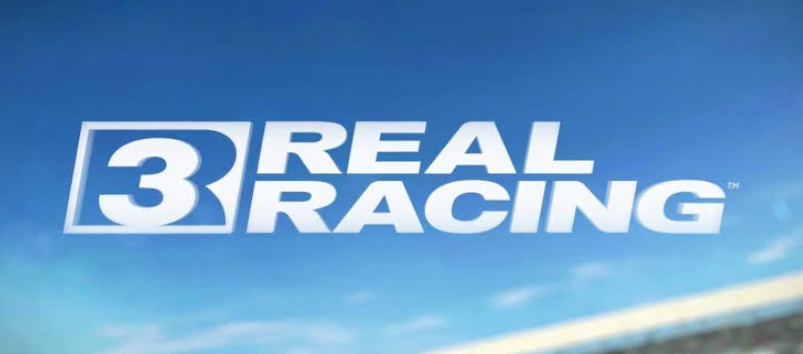

### All in all, we put the emphasis on data visualization here.

### I hope you enjoyed a lot while observing the plots and reading the analyses.

# **As always keep racing!!!**